In [11]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import librosa
import scipy

class ssm:
    def __init__(self, audio_path, k = 10, t = 'chroma', normalized = 1):
        self.audio, self.sr = self.read_audio(audio_path)
        self.s = self.create_ssm(self.calculate_feat(t), normalized)
        self.reduce_ssm(k)
        self.duration = self.duration()

    def read_audio(self, audio_path):
        audio, sr = librosa.load(audio_path)
        return audio, sr

    def calculate_feat(self, t = 'chroma'):
        print("Calculating features...")
        if t == 'chroma':
            return librosa.feature.chroma_stft(y = self.audio, sr = self.sr, n_fft = 2048)
        elif t == 'tempo':
            oenv = librosa.onset.onset_strength(y = self.audio, sr = self.sr)
            feature = librosa.feature.tempogram(onset_envelope = oenv, sr = self.sr)
            return feature

    def create_ssm(self, feat, normalized):
        print("Features calculated.")
        if normalized == 1:
            s_norm = np.linalg.norm(feat, axis = 0)
            s_norm[s_norm == 0] = 1
            feat   = np.abs(feat/s_norm)
        print("Calculating SSM...")
        s = np.dot(feat.T, feat)
        print("SSM calculated.")
        return s

    def create_ssm_old(self, feat):
        M, N = feat.shape
        s = np.zeros(N * N).reshape(N, N)
        for i in range(N):
            for j in range(N):
                s[i, j] = self.dist(feat[:, i], feat[:, j])
        return s

    def dist(self, f, g):
        return np.dot(f, g)

    def score(self, m, n):
        return self.s(m, n)

    def visualize(self):
        plt.figure(figsize=(12, 8))
        librosa.display.specshow(self.s, x_axis='frames', y_axis='frames', sr = self.sr, n_xticks=12)
        plt.title('SSM')
        plt.set_cmap('hot_r')
        plt.colorbar()
        plt.show()

    def visualize_img(self):
#        bin_s = self.s[self.s < 100]
        S = Image.fromarray(self.s * 100)
        S.show()

    def duration(self):
        return librosa.core.get_duration(self.audio, self.sr)

    def reduce_ssm(self, k):
        self.s = self.s[::k,::k]

    def threshold(self, tau):
        self.s[self.s < tau] = 0


In [64]:
sun = ssm(audio_path = 'sun.wav', t = 'chroma')

Calculating features...
Features calculated.
Calculating SSM...
SSM calculated.


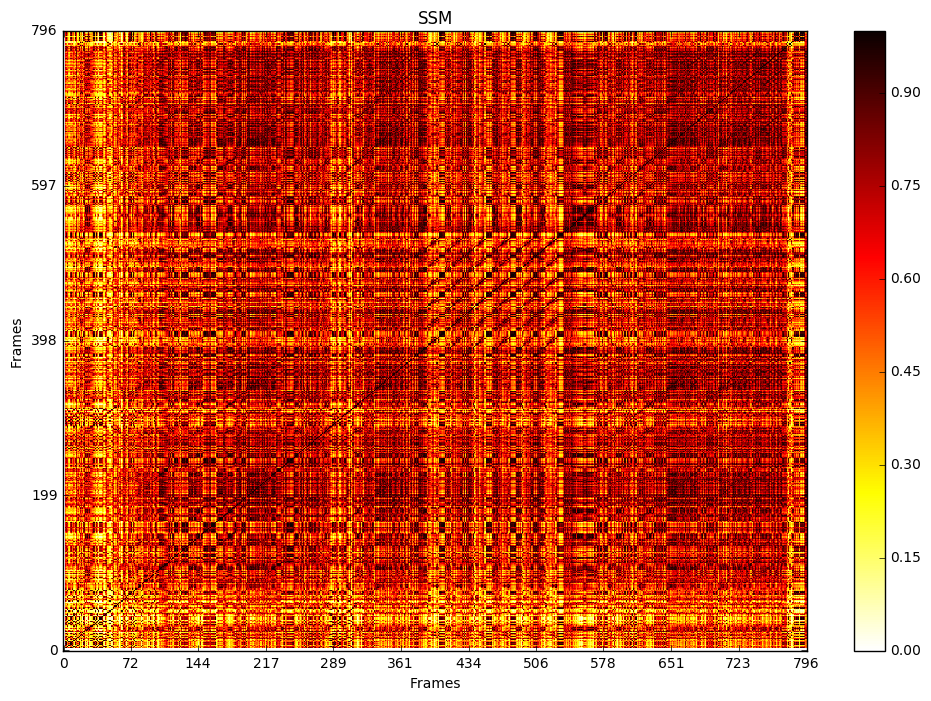

In [65]:
sun.s
sun.visualize()

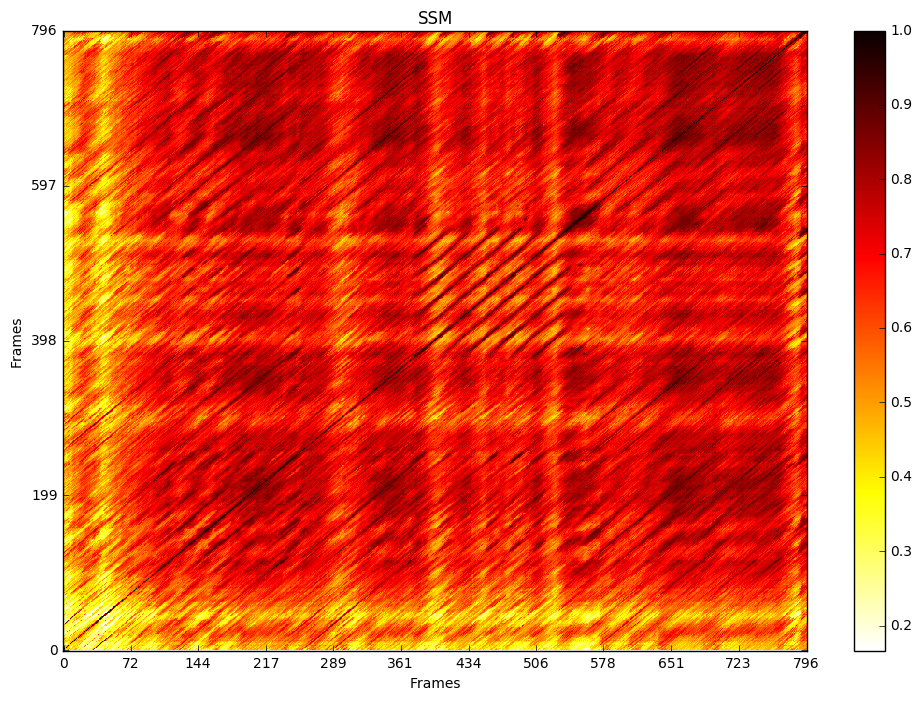

In [66]:
mask = np.eye(20)
sun.s = scipy.ndimage.filters.median_filter(sun.s,footprint=mask)
sun.visualize()

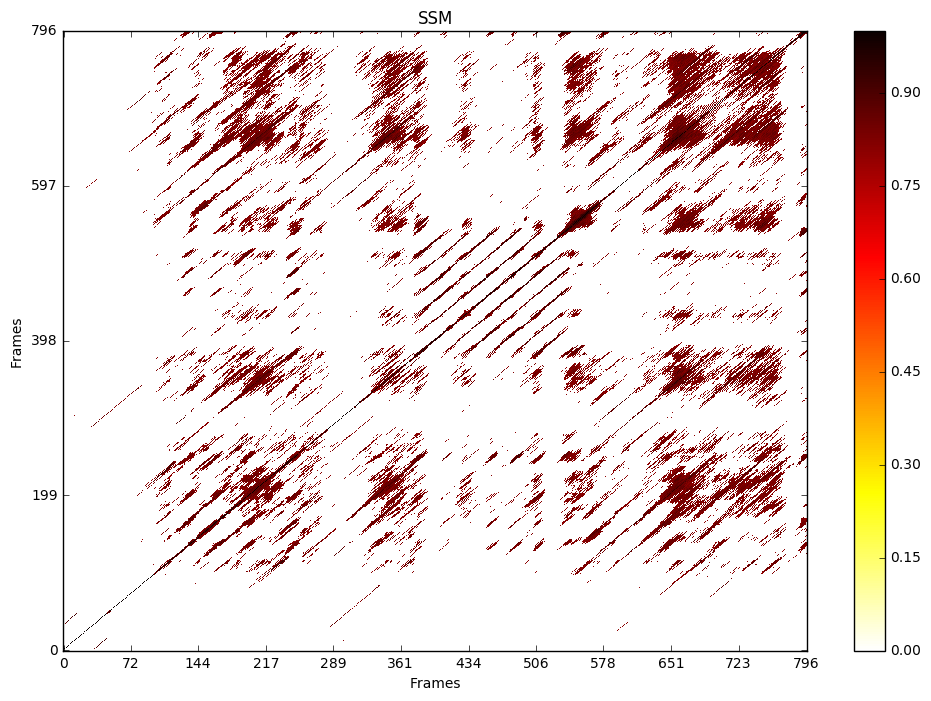

In [67]:
sun.threshold(0.8)
sun.visualize()

In [5]:
ssm.visualize_img()

In [50]:
S.show()

In [54]:
print(chroma)
print(chroma.shape)
chroma_512 = chroma[:,::3]
print(chroma_512.shape)
ssm_512 = ssm(chroma_512)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
(12, 2593)
(12, 865)
12 865


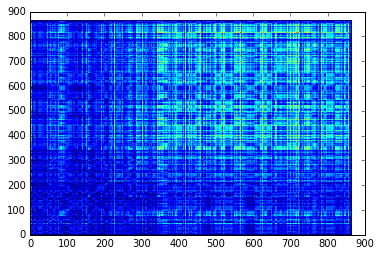

In [57]:
plt.pcolor(ssm_512.s)